### **Load libraries**

In [11]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import risk_kit as rk
from arch import arch_model
from mvgarch.mgarch import DCCGARCH
from mvgarch.ugarch import UGARCH
from mgarch import mgarch
import importlib

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### **Load data**

In [4]:
rets = pd.read_csv('selected_stocks_rets.csv', index_col=0)
stocks = pd.read_csv('selected_stocks_stocks.csv', index_col=0)

In [5]:
# Define the number of periods per year for all calculations
# 252 is an approximation for daily
# 54 for weekly
# 12 for monthly
periods_per_year = 252

### **Initial examination**

In [6]:
summary_stats = rk.summary_stats(rets, periods_per_year=periods_per_year, riskfree_rate=0)
summary_stats

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
BCOLOMBIA.CL,0.391128,0.307314,0.260757,7.001977,0.027322,0.040443,1.272729,-0.170732
BHI.CL,0.237027,0.207723,0.888932,9.704992,0.015323,0.027789,1.141070,-0.109182
BOGOTA.CL,0.079216,0.289167,0.352929,18.298282,0.022000,0.040998,0.273947,-0.242429
BVC.CL,0.177225,0.359447,0.860743,14.129626,0.025402,0.055023,0.493048,-0.222798
CELSIA.CL,0.398728,0.288779,0.487748,9.386538,0.023477,0.037980,1.380737,-0.177687
CORFICOLCF.CL,0.274582,0.315083,0.530906,4.784620,0.027674,0.039346,0.871459,-0.305882
ECOPETROL.CL,-0.108828,0.284052,-0.054319,4.889001,0.029322,0.042622,-0.383127,-0.343342
ENKA.CL,-0.089822,0.302729,0.527893,23.116234,0.020856,0.052610,-0.296707,-0.303036
GEB.CL,0.518068,0.287077,0.331661,9.822320,0.023693,0.037782,1.804629,-0.118774
GRUBOLIVAR.CL,0.041450,0.330824,0.240180,10.794973,0.029177,0.047795,0.125292,-0.277111


<Axes: xlabel='Date'>

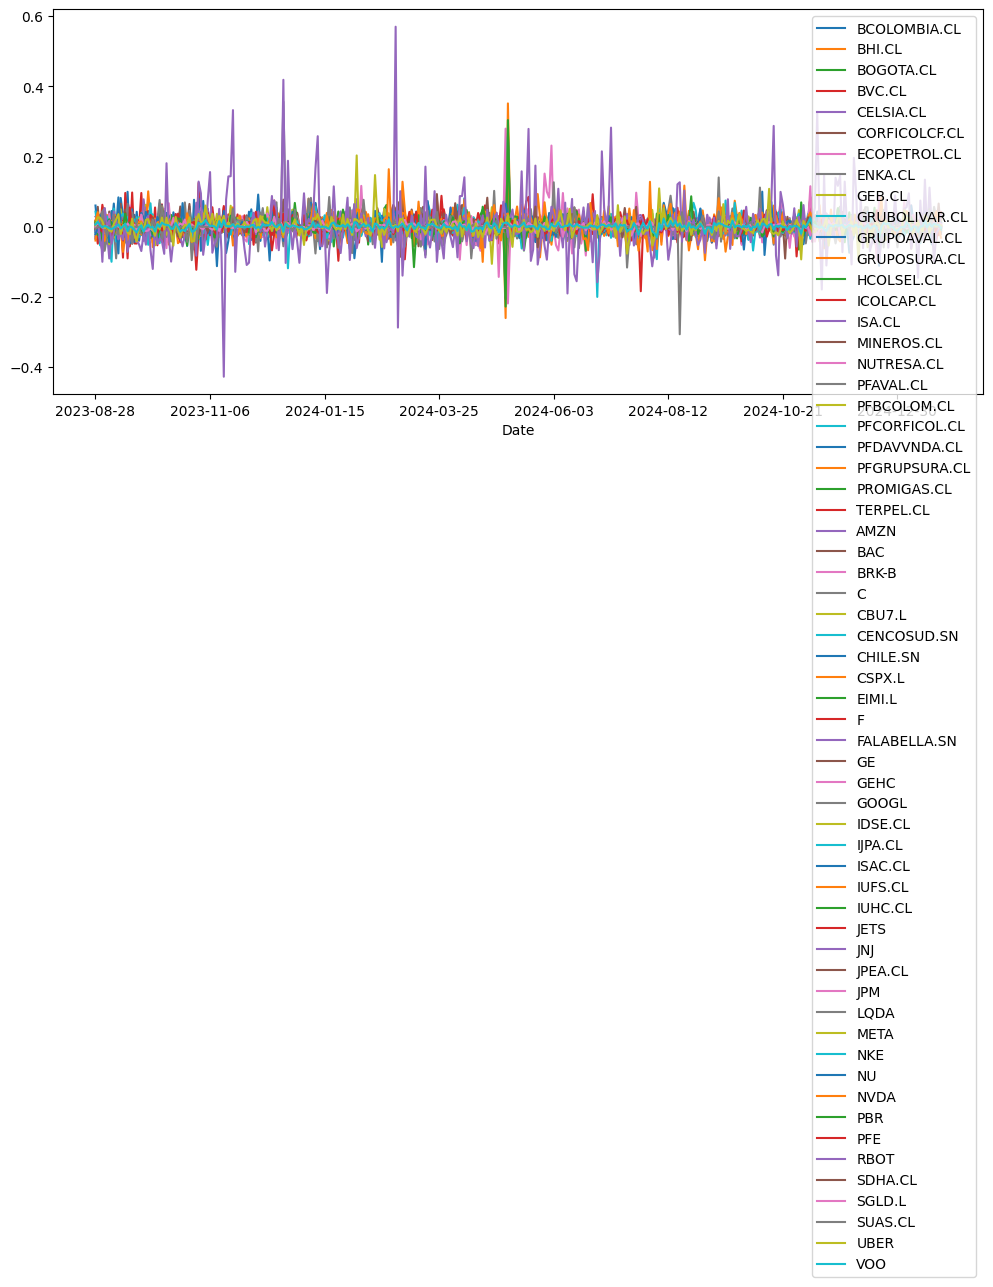

In [7]:
rets.plot(figsize=(12, 5))

### **Implementation of simple EGARCH model**

In [25]:
model = arch_model(rets['NVDA'], vol='EGARCH', p=1, q=1)
fit_model = model.fit()
print(fit_model.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4.235267566684625e+16
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1077.2861586301485
Iteration:      3,   Func. Count:     25,   Neg. LLF: 186225384.3643365
Iteration:      4,   Func. Count:     32,   Neg. LLF: -779.0065960186485
Iteration:      5,   Func. Count:     38,   Neg. LLF: -779.5070792407489
Iteration:      6,   Func. Count:     44,   Neg. LLF: -779.7708254479949
Iteration:      7,   Func. Count:     50,   Neg. LLF: -780.0466595398204
Iteration:      8,   Func. Count:     56,   Neg. LLF: -762.5810327344954
Iteration:      9,   Func. Count:     63,   Neg. LLF: -780.048849347022
Iteration:     10,   Func. Count:     69,   Neg. LLF: -782.8109037201159
Iteration:     11,   Func. Count:     75,   Neg. LLF: -786.2360797582753
Iteration:     12,   Func. Count:     81,   Neg. LLF: -786.3860827524354
Iteration:     13,   Func. Count:     86,   Neg. LLF: -786.3874900758536
Iteration:     14,   Func. Count:     91,   Neg. L

C:\Python projects\Finance\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008829. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [13]:
# ref: https://github.com/srivastavaprashant/mgarch
vol = mgarch('t')
vol.fit(rets)
ndays = 10
cov_nextday = vol.predict(10)